In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
T = 50;
dt = 0.125;
time = np.arange(0,T+dt,dt)

In [3]:
S=np.zeros(len(time))

In [4]:
Pn=np.zeros(len(time))

In [5]:
#definig other parameters
Pref = 0 #resting potential
Pmin = -1 #minimum potential
Pth = 25 #threshold
Pspike = 40 #spike potential
t_ref = 5 #refractory time duration
R = 0.01

In [6]:
count = 0
t_rest = 0

In [7]:
for i,t in enumerate(time):
    if i==0:
        Pn[i] = 20
    else:
        if t<=t_rest: #Refractory period
            Pn[i] = Pref
        elif t>t_rest: # Not Refractory
            if Pn[i-1]>Pmin: # Not Hyperpolarized
                Pn[i] = Pn[i-1] + (R*S[i]) - (dt*(Pn[i-1]-Pref))
            else: # Hyperpolarized
                Pn[i] = 0
        if Pn[i]>=Pth: # Spike
            Pn[i] = Pspike
            t_rest = t+t_ref

In [13]:
target=20*np.exp(-1*time)

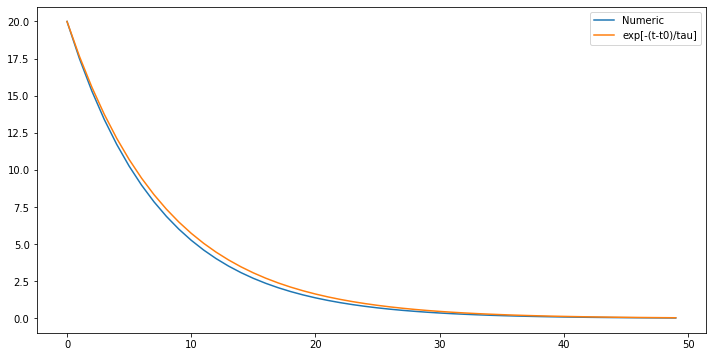

In [20]:
plt.figure(figsize=(12,6))
plt.plot(Pn[:50],label='Numeric')
plt.plot(target[:50],label='exp[-(t-t0)/tau]')
plt.legend()
plt.show()